## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,ROCK-B.CO,Rockwool A/S ser. B,Buy,1.74,1.49,0.2,0.05,0.62,0.89,-0.02,...,9.94,17.72,1.99,NaN,0.0,0.03,Industrials,Building Products & Equipment,Denmark,True


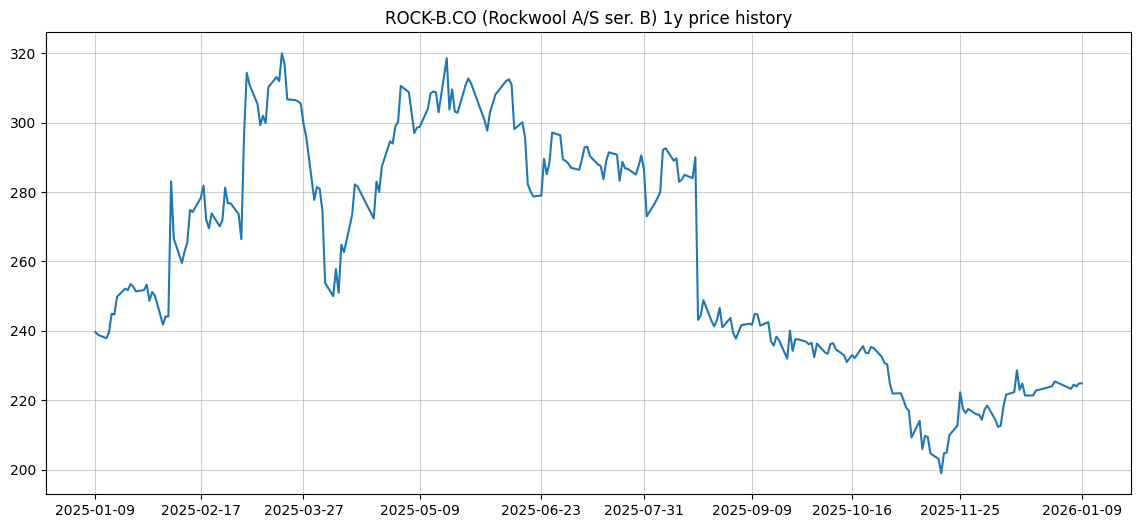

50d Average Change%: 0.03


In [3]:
symbol = "ROCK-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 75/75 [00:49<00:00,  1.51it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.49,2.09,0.36,0.04,0.95,0.83,0.12,...,7.78,30.69,1.19,0.01,0.0,0.03,Healthcare,Biotechnology,Denmark,False
0,TRMD,TORM plc,Buy,2.02,1.70,0.21,0.11,0.88,0.58,0.14,...,5.99,2.73,1.04,0.42,0.0,0.08,Energy,Oil & Gas Midstream,United Kingdom,True
0,GUBRA.CO,Gubra A/S,Buy,2.00,1.88,-0.00,0.13,0.99,0.90,-0.20,...,78.15,106.08,6.99,0.08,0.0,0.09,Healthcare,Biotechnology,Denmark,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.94,1.77,0.03,0.14,0.80,0.85,0.07,...,8.28,3.84,1.54,0.49,0.0,0.11,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.93,2.07,0.02,-0.16,1.00,0.90,-0.02,...,33.45,91.29,1.96,0.03,0.0,-0.13,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,BAESY,BAE Systems PLC,Sell,-1.00,-1.33,0.16,0.18,-0.96,-0.02,-0.20,...,4.27,3.51,22.67,0.86,0.0,0.18,Industrials,Aerospace & Defense,United Kingdom,False
0,UBER,"Uber Technologies, Inc.",Sell,-1.02,-0.88,-0.14,-0.00,-1.09,0.33,-0.20,...,5.16,1.94,6.48,0.46,-1.3,-0.00,Technology,Software - Application,United States,False
0,VWS.CO,Vestas Wind Systems A/S,Sell,-1.22,-1.54,0.16,0.16,-0.73,-0.43,-0.20,...,3.19,6.96,7.02,0.96,0.0,0.14,Industrials,Specialty Industrial Machinery,Denmark,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.53,-1.82,0.22,0.07,-1.10,-0.69,0.15,...,2.15,3.54,0.87,1.09,0.0,0.05,Technology,Electronics & Computer Distribution,Denmark,False
